# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [47]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Notebook Presentation

In [3]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [4]:
df_apps = pd.read_csv('apps_analytics.csv')

# Data Cleaning

<li>No. of rows and columns in `df_apps`</li>
<li>The column names</li>
<li>A random sample of 5 different rows</li>

In [5]:
df_apps.shape

(10841, 12)

In [6]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [7]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
8244,Cookbook Recipes,FOOD_AND_DRINK,4.10,46539,14.50,"5,000,000",Free,0,Teen,Food & Drink,"July 23, 2018",Varies with device
10527,Microsoft OneDrive,PRODUCTIVITY,4.40,1038303,4.00,"100,000,000",Free,0,Everyone,Productivity,"August 1, 2018",Varies with device
3995,Battery Notifier Pro BT,TOOLS,4.70,1363,1.60,"10,000",Paid,$2.59,Everyone,Tools,"June 7, 2017",1.6 and up
9265,Legend - Animate Text in Video,SOCIAL,4.50,228737,5.30,"10,000,000",Free,0,Everyone,Social,"July 12, 2016",Varies with device
4360,Be My Love Animated Keyboard,PERSONALIZATION,4.60,838,11.00,"50,000",Free,0,Teen,Personalization,"March 30, 2018",4.1 and up


### Drop Unused Columns

Removing the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [8]:
df_apps.drop(columns=['Last_Updated', 'Android_Ver'], axis=1, inplace=True)

### Finding and Remove NaN values in Ratings

How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [9]:
df_apps_clean = df_apps.dropna()
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


In [10]:
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [11]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [12]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [13]:
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [14]:
df_apps_clean.shape

(8199, 10)

# Finding Highest Rated Apps

Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [15]:
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [16]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Finding the 5 Apps with Most Reviews

Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [17]:
df_apps_clean.sort_values('Reviews', ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [18]:
ratings = df_apps_clean.Content_Rating.value_counts()
print(f"Content Rating: {ratings}")

Content Rating: Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64


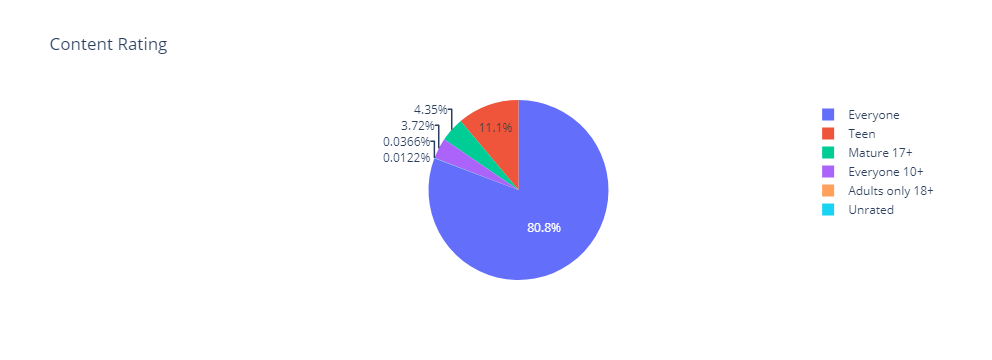

In [48]:
r_data = {'Content_Rating': ratings.index, 'Count': ratings.values}
ratings_df = pd.DataFrame(r_data)
fig = go.Figure(data=[go.Pie(labels=ratings_df['Content_Rating'], values=ratings_df['Count'])])
fig.update_layout(title_text="Content Rating")
# ratings_data = {'Content Rating': ratings.index, 'Count': ratings.values}
# fig = px.pie(ratings_data, labels=ratings.index, values='Count', title='Content Rating', names='Content Rating')
# fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

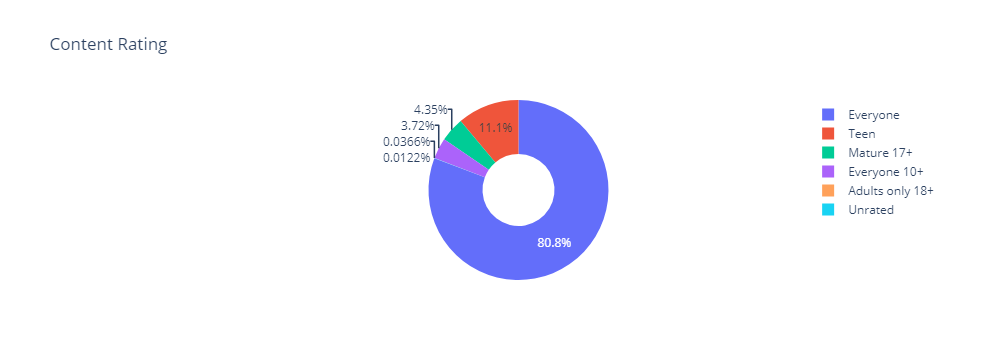

In [49]:
r_data = {'Content_Rating': ratings.index, 'Count': ratings.values}
ratings_df = pd.DataFrame(r_data)
fig = go.Figure(data=[go.Pie(labels=ratings_df['Content_Rating'], values=ratings_df['Count'], hole=0.4)])  # Adjust the hole value as needed
fig.update_layout(title_text="Content Rating")
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [21]:
print(df_apps_clean.Installs.describe()) # (or) df_apps_clean.info()
billion_download_apps = df_apps_clean[['App', 'Installs']].groupby('Installs').count()
print(f"\n\nApps with 1 billion+ installs: {billion_download_apps.count()}")

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object


Apps with 1 billion+ installs: App    19
dtype: int64


In [22]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Finding the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [23]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "", regex=True)
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
print(f"Top 20 most expensive apps:\n {df_apps_clean[['App', 'Price']].sort_values('Price', ascending=False).head(20)}")

Top 20 most expensive apps:
                                  App  Price
3946        I'm Rich - Trump Edition 400.00
2461              I AM RICH PRO PLUS 399.99
4606               I Am Rich Premium 399.99
3145              I am rich(premium) 399.99
3554                      💎 I'm rich 399.99
5765                       I am rich 399.99
1946  I am rich (Most expensive app) 399.99
2775                   I Am Rich Pro 399.99
3221                  I am Rich Plus 399.99
3114                       I am Rich 399.99
1331          most expensive app (H) 399.99
2394                      I am Rich! 399.99
3897                       I Am Rich 389.99
2193             I am extremely Rich 379.99
3856                   I am rich VIP 299.99
2281       Vargo Anesthesia Mega App  79.99
1407                    LTC AS Legal  39.99
2629                I am Rich Person  37.99
2481         A Manual of Acupuncture  33.99
4264         Golfshot Plus: Golf GPS  29.99


### The most expensive apps sub $250

In [24]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [25]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [26]:
df_apps_clean.Category.nunique()

33

In [27]:
top_10_category = df_apps_clean.Category.value_counts()[:10]
top_10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

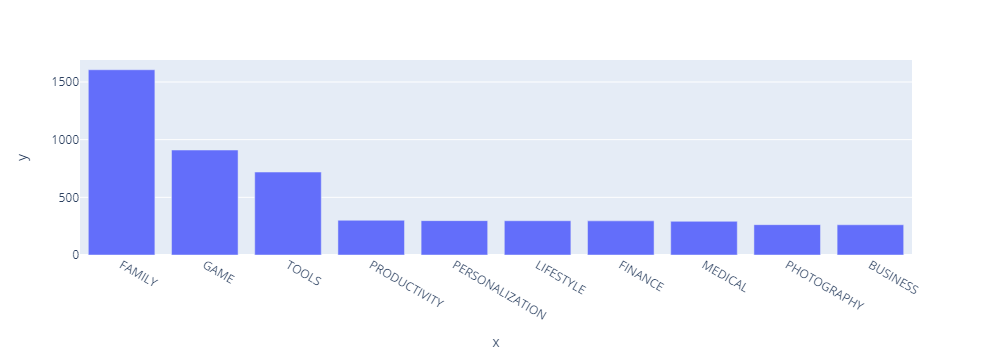

In [28]:
bar = px.bar(x = top_10_category.index, y = top_10_category.values)
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [29]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)
category_installs

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


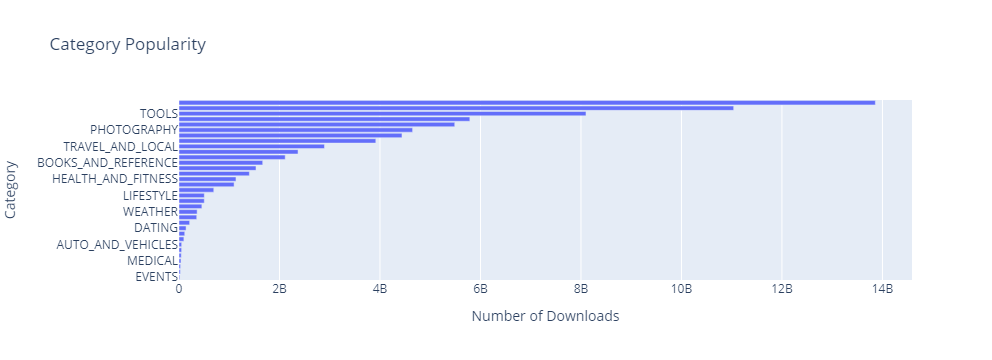

In [30]:
h_bar = px.bar(x=category_installs.Installs, y=category_installs.index, orientation='h', title='Category Popularity')
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

The dimensions of the DataFrame are: (33, 2)
cat_merged_df:
                       App     Installs
Category                              
GAME                  910  13858762717
COMMUNICATION         257  11039241530
TOOLS                 719   8099724500
PRODUCTIVITY          301   5788070180
SOCIAL                203   5487841475
PHOTOGRAPHY           263   4649143130
FAMILY               1606   4437554490
VIDEO_PLAYERS         148   3916897200
TRAVEL_AND_LOCAL      187   2894859300
NEWS_AND_MAGAZINES    204   2369110650
ENTERTAINMENT         102   2113660000
BOOKS_AND_REFERENCE   169   1665791655
PERSONALIZATION       298   1532352930
SHOPPING              180   1400331540
HEALTH_AND_FITNESS    243   1134006220
SPORTS                260   1096431465
BUSINESS              262    692018120
LIFESTYLE             297    503611120
MAPS_AND_NAVIGATION   118    503267560
FINANCE               296    455249400
WEATHER                72    361096500
EDUCATION             118    352852000
FOO

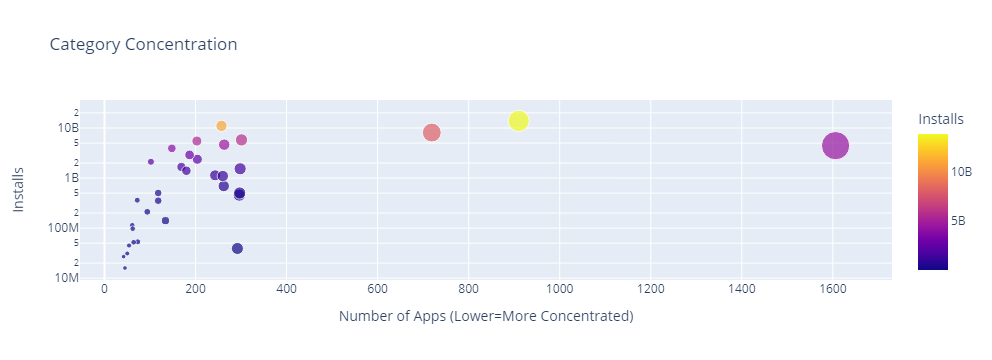

In [31]:
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
print(f"cat_merged_df:\n {cat_merged_df.sort_values('Installs', ascending=False)}")
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()

# Extracting Nested Data from a Column

How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [32]:
print(f"Number of genres?: {len(df_apps_clean.Genres.unique())}")
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}\n\n {num_genres}')

Number of genres?: 114
We now have a single column with shape: (8564,)
Number of genres: 53

 Tools                      719
Education                  587
Entertainment              498
Action                     304
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strateg

# Colour Scales in Plotly Charts - Competition in Genres

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

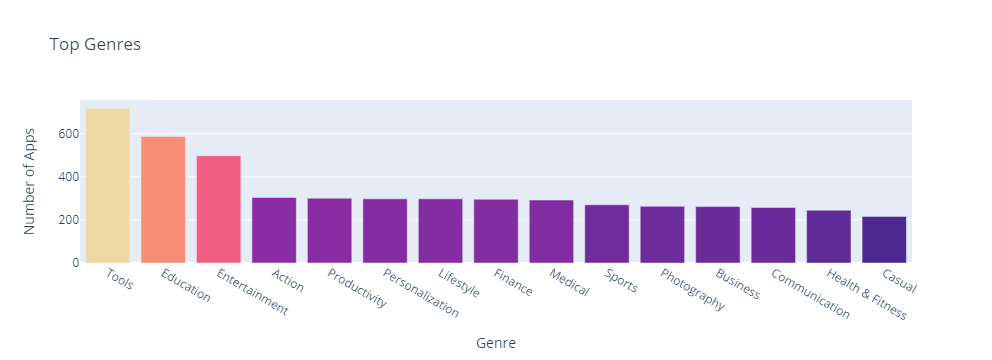

In [33]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [34]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

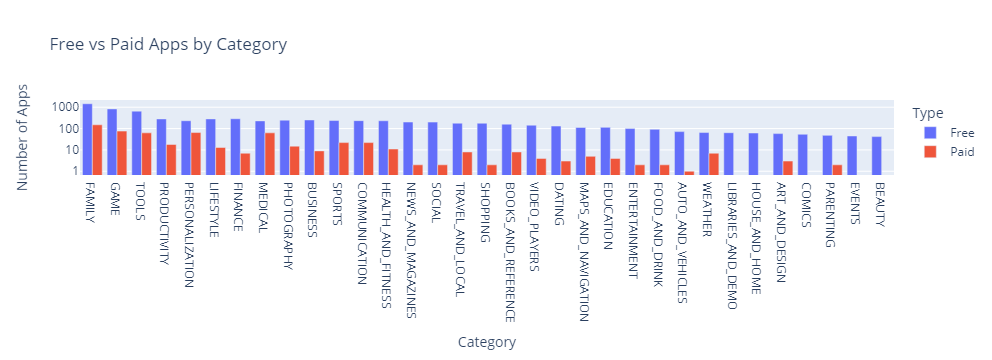

In [35]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html)


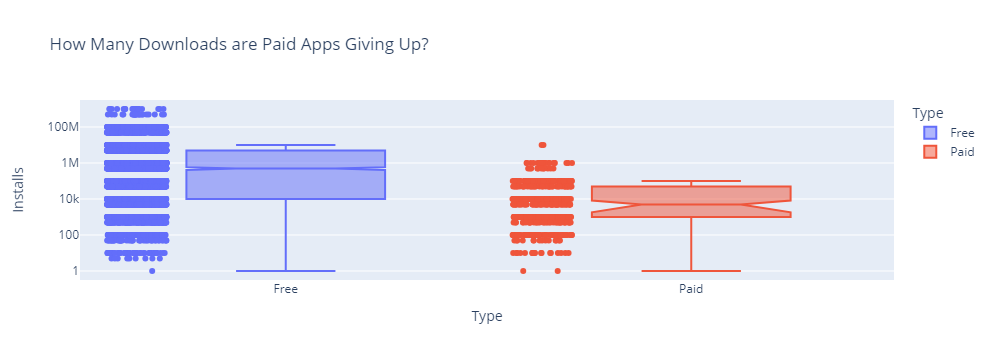

In [36]:
box = px.box(df_apps_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
 
box.update_layout(yaxis=dict(type='log'))
 
box.show()

# Plotly Box Plots: Revenue by App Category

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

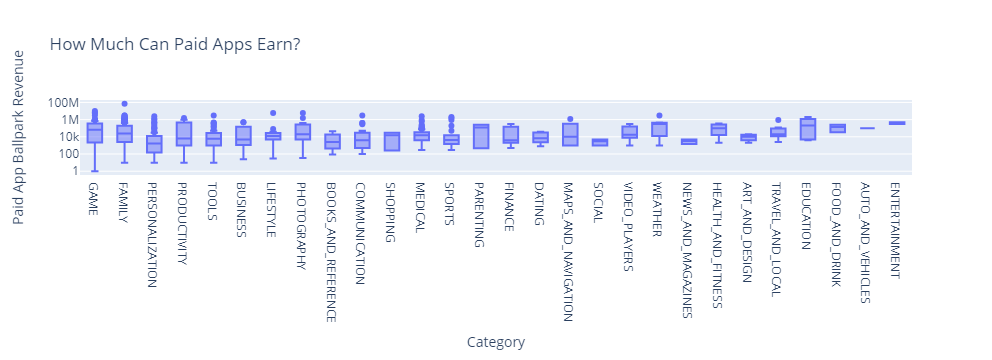

In [37]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [38]:
df_paid_apps.Price.median()

2.99

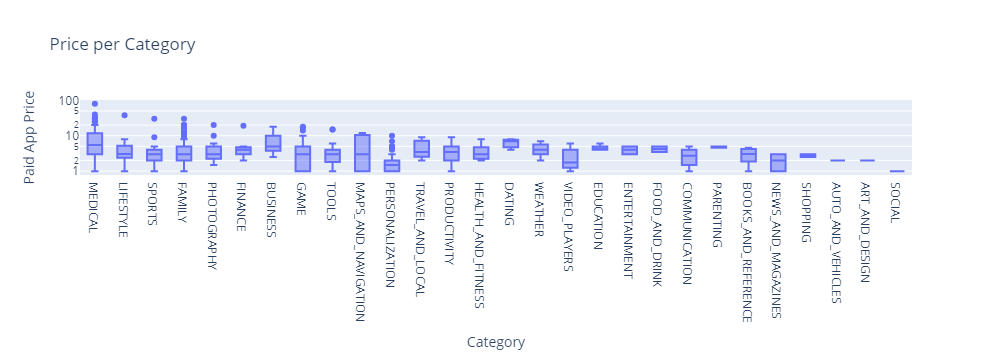

In [39]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box.show()